# Spaceship Titanic Transported Prediction

Predicting whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

## File and Data Field Descriptions
train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is -travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

sample_submission.csv - A submission file in the correct format.
PassengerId - Id for each passenger in the test set.
Transported - The target. For each passenger, predict either True or False.

## Importing Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport

## Get the Data

In [2]:
df = pd.read_csv("train.csv")

## EDA - Exploratory Data Analysis

In [3]:
# Checking the head
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
# passenger id separate group (feature engineer)
# cabin feature engineering
# home planet visualize,home fill - max repeated value and getdummies
# Check vip correlation and fill in its missing values
# Vip convert object to 0 n 1
# Visualize Destination and fill in the max repeated value
# Cryo Sleep convert to 0 n 1
# Transported convert to 0 n 1
# Check Destination

In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Checking for Missing Data

In [7]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
df.isna().sum()/len(df)*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [9]:
df.corr()['Transported'].sort_values()

RoomService    -0.244611
Spa            -0.221131
VRDeck         -0.207075
Age            -0.075026
ShoppingMall    0.010141
FoodCourt       0.046566
Transported     1.000000
Name: Transported, dtype: float64

In [10]:
profile = ProfileReport(df,title="Report",explorative=True)

In [ ]:
profile.to_widgets()

In [ ]:
profile.to_file("Analysis Report.html")

## Filling in Missing Data

In [11]:
# Room Service
df['RoomService'].fillna(df['RoomService'].mean(),inplace=True)
# FoodCourt
df['FoodCourt'].fillna(df['FoodCourt'].mean(),inplace=True)
# ShoppingMall
df['ShoppingMall'].fillna(df['ShoppingMall'].mean(),inplace=True)
# mean - Spa            
df['Spa'].fillna(df['Spa'].mean(),inplace=True)
# median -VRDeck 
df['VRDeck'].fillna(df['VRDeck'].mean(),inplace=True)


In [12]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [13]:
# Dropping the Name
df.drop("Name",axis=1,inplace=True)

In [14]:
print(df['HomePlanet'].dropna().sort_values().unique())

['Earth' 'Europa' 'Mars']


In [15]:
df["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [16]:
df["HomePlanet"].fillna("Earth",inplace=True)

In [17]:
df["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [18]:
df["VIP"].fillna(False,inplace=True)

In [19]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [20]:
df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [21]:
df['Destination'].fillna("TRAPPIST-1e",inplace=True)

In [22]:
df["CryoSleep"].value_counts().idxmax()

False

In [23]:
df['CryoSleep'].fillna(df["CryoSleep"].value_counts().idxmax(),inplace=True)

In [24]:
df["Cabin"].value_counts().sort_values()

F/1433/P    1
G/71/P      1
G/64/S      1
E/26/S      1
F/83/S      1
           ..
C/21/P      7
F/1411/P    7
B/11/S      7
F/1194/P    7
G/734/S     8
Name: Cabin, Length: 6560, dtype: int64

In [25]:
df=df.dropna()

In [26]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8494 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8494 non-null   object 
 1   HomePlanet    8494 non-null   object 
 2   CryoSleep     8494 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8494 non-null   object 
 5   Age           8494 non-null   float64
 6   VIP           8494 non-null   bool   
 7   RoomService   8494 non-null   float64
 8   FoodCourt     8494 non-null   float64
 9   ShoppingMall  8494 non-null   float64
 10  Spa           8494 non-null   float64
 11  VRDeck        8494 non-null   float64
 12  Transported   8494 non-null   bool   
dtypes: bool(3), float64(6), object(4)
memory usage: 754.8+ KB


In [28]:
# Mapping 0 n 1
df['CryoSleep'].replace({True:1,False:0},inplace=True)
# pd get dummies for - HomePlanet, Destination

C:\Users\Deeshu\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [29]:
df['Transported'].replace({True:1,False:0},inplace=True)

In [30]:
df['VIP'].replace({True:1,False:0},inplace=True)

In [31]:
df2 = pd.get_dummies(df['HomePlanet'],drop_first=True)

In [32]:
df.drop("HomePlanet",axis=1,inplace=True)

C:\Users\Deeshu\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
# concatenated = pandas.concat([df1, df2], axis="columns")
df = pd.concat([df, df2], axis="columns")

In [34]:
df3 = pd.get_dummies(df['Destination'],drop_first=True)
df.drop("Destination",axis=1,inplace=True)
# concatenated = pandas.concat([df1, df2], axis="columns")
df = pd.concat([df, df3], axis="columns")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8494 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8494 non-null   object 
 1   CryoSleep      8494 non-null   int64  
 2   Cabin          8494 non-null   object 
 3   Age            8494 non-null   float64
 4   VIP            8494 non-null   int64  
 5   RoomService    8494 non-null   float64
 6   FoodCourt      8494 non-null   float64
 7   ShoppingMall   8494 non-null   float64
 8   Spa            8494 non-null   float64
 9   VRDeck         8494 non-null   float64
 10  Transported    8494 non-null   int64  
 11  Europa         8494 non-null   uint8  
 12  Mars           8494 non-null   uint8  
 13  PSO J318.5-22  8494 non-null   uint8  
 14  TRAPPIST-1e    8494 non-null   uint8  
dtypes: float64(6), int64(3), object(2), uint8(4)
memory usage: 829.5+ KB


## Feature Engineering

In [36]:
# Cabin n Passenger - Group
df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,Mars,PSO J318.5-22,TRAPPIST-1e
0,0001_01,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
1,0002_01,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,1
2,0003_01,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,1
3,0003_02,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,1
4,0004_01,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,1


In [37]:
df["Cabin"]

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8494, dtype: object

In [38]:
df["Cabin"].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [39]:
df['deck'] = df['Cabin'].apply(lambda x: x.split("/")[0])
df['num'] = df['Cabin'].apply(lambda x: x.split("/")[1])
df['side'] = df['Cabin'].apply(lambda x: x.split("/")[2])

In [40]:
df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,Mars,PSO J318.5-22,TRAPPIST-1e,deck,num,side
0,0001_01,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,B,0,P
1,0002_01,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,1,F,0,S
2,0003_01,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,1,A,0,S
3,0003_02,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,1,A,0,S
4,0004_01,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,1,F,1,S


In [41]:
df.drop("Cabin",axis=1,inplace=True)

In [42]:
df['deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: deck, dtype: int64

In [43]:
df['num'].value_counts()

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: num, Length: 1817, dtype: int64

In [44]:
df['side'].value_counts()

S    4288
P    4206
Name: side, dtype: int64

In [45]:
df4 = pd.get_dummies(df['side'],drop_first=True)
df.drop("side",axis=1,inplace=True)
# concatenated = pandas.concat([df1, df2], axis="columns")
df = pd.concat([df, df4], axis="columns")

In [46]:
deck = pd.get_dummies(df['deck'],drop_first=True)
df.drop("deck",axis=1,inplace=True)
# concatenated = pandas.concat([df1, df2], axis="columns")
df = pd.concat([df, deck], axis="columns")

In [47]:
df['gggg'] = df["PassengerId"].apply(lambda x: int(x.split("_")[0]))
df['pp'] = df["PassengerId"].apply(lambda x: int(x.split("_")[1]))

In [48]:
df['gggg'].value_counts()

5133    8
4498    8
8168    8
8956    8
984     8
       ..
3487    1
3486    1
3483    1
3480    1
4638    1
Name: gggg, Length: 6118, dtype: int64

In [49]:
df['pp'].value_counts()

1    6083
2    1377
3     551
4     225
5     127
6      75
7      43
8      13
Name: pp, dtype: int64

In [51]:
df.corr()['Transported'].sort_values()

RoomService     -0.246156
Spa             -0.217905
VRDeck          -0.205386
E               -0.099254
TRAPPIST-1e     -0.097219
F               -0.089308
Age             -0.076427
VIP             -0.035086
D               -0.034479
T               -0.014739
PSO J318.5-22    0.003396
ShoppingMall     0.011715
G                0.016505
Mars             0.020332
gggg             0.022568
FoodCourt        0.048048
pp               0.065912
S                0.103775
C                0.109558
B                0.146571
Europa           0.176303
CryoSleep        0.459200
Transported      1.000000
Name: Transported, dtype: float64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8494 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CryoSleep      8494 non-null   int64  
 1   Age            8494 non-null   float64
 2   VIP            8494 non-null   int64  
 3   RoomService    8494 non-null   float64
 4   FoodCourt      8494 non-null   float64
 5   ShoppingMall   8494 non-null   float64
 6   Spa            8494 non-null   float64
 7   VRDeck         8494 non-null   float64
 8   Transported    8494 non-null   int64  
 9   Europa         8494 non-null   uint8  
 10  Mars           8494 non-null   uint8  
 11  PSO J318.5-22  8494 non-null   uint8  
 12  TRAPPIST-1e    8494 non-null   uint8  
 13  num            8494 non-null   object 
 14  S              8494 non-null   uint8  
 15  B              8494 non-null   uint8  
 16  C              8494 non-null   uint8  
 17  D              8494 non-null   uint8  
 18  E       

## Normalizing the Data

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
scaled_feat = scaler.fit_transform(df.drop(["PassengerId","Transported"],axis=1))

## Splitting the Dataset

In [57]:
x_test=

## Model Creation

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [59]:
lr = LogisticRegression()
svm = SVC()
rfc = RandomForestClassifier(n_estimators=55)

In [75]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [60]:
rfc.fit(x_train,y_train)
lr.fit(x_train,y_train)
svm.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [77]:
print(accuracy_score(y_test,knn_pred))

0.7557061340941512


Text(0, 0.5, 'Error Rate')

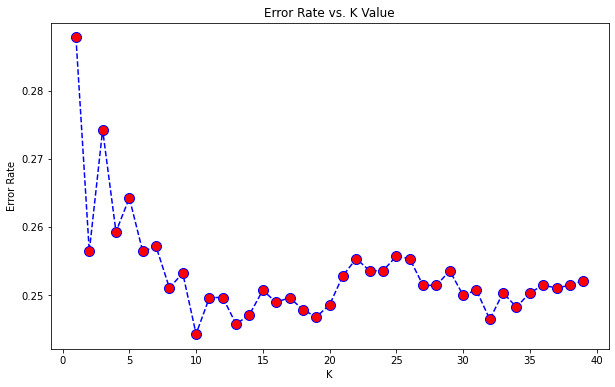

In [74]:
# TO FIND THE BEST VALUE OF K
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [78]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [79]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.705 total time=   0.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.728 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.720 total time=   0.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.734 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.735 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.699 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.712 total time=   0.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.699 total time=   0.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.761 total time=   1.6s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.769 total time=   1.5s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.777 total time=   1.4s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.766 total time=   1.6s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.772 total time=   0.8s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.793 total time=   0.9s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.805 total time=   0.8s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.796 total time=   1.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.796 total time=   0.8s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.774 total time=   0.5s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.808 total time=   0.5s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.804 total time=   0.6s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [80]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [81]:
grid_pred=grid.predict(x_test)
print(accuracy_score(y_test,grid_pred))

0.8120542082738944


In [84]:
parameters = list(range(1,101,2))
print(parameters)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]


In [86]:
param_grid = {'n_estimators':parameters} 
grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3)

In [89]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ....................n_estimators=1;, score=0.702 total time=   0.0s
[CV 2/5] END ....................n_estimators=1;, score=0.727 total time=   0.0s
[CV 3/5] END ....................n_estimators=1;, score=0.733 total time=   0.0s
[CV 4/5] END ....................n_estimators=1;, score=0.699 total time=   0.0s
[CV 5/5] END ....................n_estimators=1;, score=0.705 total time=   0.0s
[CV 1/5] END ....................n_estimators=3;, score=0.733 total time=   0.0s
[CV 2/5] END ....................n_estimators=3;, score=0.740 total time=   0.0s
[CV 3/5] END ....................n_estimators=3;, score=0.756 total time=   0.0s
[CV 4/5] END ....................n_estimators=3;, score=0.747 total time=   0.0s
[CV 5/5] END ....................n_estimators=3;, score=0.752 total time=   0.0s
[CV 1/5] END ....................n_estimators=5;, score=0.748 total time=   0.0s
[CV 2/5] END ....................n_estimators=5

[CV 2/5] END ...................n_estimators=41;, score=0.786 total time=   0.0s
[CV 3/5] END ...................n_estimators=41;, score=0.807 total time=   0.0s
[CV 4/5] END ...................n_estimators=41;, score=0.773 total time=   0.1s
[CV 5/5] END ...................n_estimators=41;, score=0.788 total time=   0.0s
[CV 1/5] END ...................n_estimators=43;, score=0.787 total time=   0.1s
[CV 2/5] END ...................n_estimators=43;, score=0.795 total time=   0.0s
[CV 3/5] END ...................n_estimators=43;, score=0.812 total time=   0.1s
[CV 4/5] END ...................n_estimators=43;, score=0.782 total time=   0.1s
[CV 5/5] END ...................n_estimators=43;, score=0.790 total time=   0.1s
[CV 1/5] END ...................n_estimators=45;, score=0.785 total time=   0.1s
[CV 2/5] END ...................n_estimators=45;, score=0.779 total time=   0.1s
[CV 3/5] END ...................n_estimators=45;, score=0.808 total time=   0.1s
[CV 4/5] END ...............

[CV 4/5] END ...................n_estimators=81;, score=0.779 total time=   0.2s
[CV 5/5] END ...................n_estimators=81;, score=0.786 total time=   0.2s
[CV 1/5] END ...................n_estimators=83;, score=0.787 total time=   0.2s
[CV 2/5] END ...................n_estimators=83;, score=0.783 total time=   0.2s
[CV 3/5] END ...................n_estimators=83;, score=0.821 total time=   0.2s
[CV 4/5] END ...................n_estimators=83;, score=0.779 total time=   0.2s
[CV 5/5] END ...................n_estimators=83;, score=0.785 total time=   0.2s
[CV 1/5] END ...................n_estimators=85;, score=0.786 total time=   0.2s
[CV 2/5] END ...................n_estimators=85;, score=0.786 total time=   0.2s
[CV 3/5] END ...................n_estimators=85;, score=0.813 total time=   0.2s
[CV 4/5] END ...................n_estimators=85;, score=0.781 total time=   0.2s
[CV 5/5] END ...................n_estimators=85;, score=0.790 total time=   0.2s
[CV 1/5] END ...............

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39,
                                          41, 43, 45, 47, 49, 51, 53, 55, 57,
                                          59, ...]},
             verbose=3)

In [91]:
grid.best_params_

{'n_estimators': 55}

In [90]:
grid_pred_rfc=grid.predict(x_test)
print(accuracy_score(y_test,grid_pred_rfc))

0.8159771754636234


## Different Models Compared

## Ensemble Learning Implemented

In [ ]:
# create the sub models
x_train, x_test, y_train, y_test = train_test_split(scaled_feat,df["Transported"] , test_size=0.25,random_state=42)
estimators = []
model1 = LogisticRegression()
estimators.append(('lr', model1))
model2 = RandomForestClassifier(n_estimators=75)
estimators.append(('random forest', model2))
model3 = SVC(C=1,gamma=0.001,probability=True)
estimators.append(('svm', model3))
vot_hard = VotingClassifier(estimators = estimators, voting ='hard',weights=[2,1,3])
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)
vot_soft = VotingClassifier(estimators = estimators, voting ='soft',weights=[2,1,3])
vot_soft.fit(x_train, y_train)
y_pred = vot_soft.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
for clf in (model1,model2,model3,vot_hard,vot_soft):
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        print(clf.__class__.__name__)
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test,y_pred))
        print('--------------------------------------')
        
    